In [1]:
#wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#stats
import scipy.stats as stats

#visuals
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

import env
import os
import wrangle_zillow

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_zillow.get_zillow_data()

Using cached csv


In [3]:
df.shape

(77580, 69)

In [4]:
zillow = wrangle_zillow.clean_zillow(df)

In [5]:
zillow.shape

(64838, 27)

In [6]:
zillow.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county,age
0,3.5,4.0,NaN,3100.0,3100.0,3.0,33634931.0,-117869207.0,4506.0,122,...,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential,Orange,24.0
1,1.0,2.0,NaN,1465.0,1465.0,1.0,34449266.0,-119281531.0,12647.0,1110,...,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential,Ventura,55.0
2,2.0,3.0,NaN,1243.0,1243.0,2.0,33886168.0,-117823170.0,8432.0,122,...,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential,Orange,60.0
3,3.0,4.0,8.0,2376.0,2376.0,3.0,34245180.0,-118240722.0,13038.0,0101,...,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential,Los_Angeles,52.0
4,3.0,3.0,8.0,1312.0,1312.0,3.0,34185120.0,-118414640.0,278581.0,010C,...,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium,Los_Angeles,58.0


In [7]:
zillow.shape

(64838, 27)

In [8]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64838 entries, 0 to 77579
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   64838 non-null  float64
 1   bedroomcnt                    64838 non-null  float64
 2   buildingqualitytypeid         40278 non-null  float64
 3   calculatedfinishedsquarefeet  64838 non-null  float64
 4   finishedsquarefeet12          64709 non-null  float64
 5   fullbathcnt                   64830 non-null  float64
 6   latitude                      64838 non-null  float64
 7   longitude                     64838 non-null  float64
 8   lotsizesquarefeet             57174 non-null  float64
 9   propertycountylandusecode     64838 non-null  object 
 10  regionidcity                  63622 non-null  float64
 11  regionidcounty                64838 non-null  float64
 12  regionidzip                   64805 non-null  float64
 13  r

In [9]:
# split the data into train, validate, test
train, validate, test = wrangle_zillow.split_data(zillow)

In [10]:
train.shape, validate.shape, test.shape

((36309, 27), (15561, 27), (12968, 27))

In [11]:
# Filling nulls with mean/median from train data
train, validate, test = wrangle_zillow.handle_nulls(train, validate, test)

In [12]:
train.isnull().sum()

bathroomcnt                      0
bedroomcnt                       0
buildingqualitytypeid            0
calculatedfinishedsquarefeet     0
finishedsquarefeet12             0
fullbathcnt                      0
latitude                         0
longitude                        0
lotsizesquarefeet                0
propertycountylandusecode        0
regionidcity                     0
regionidcounty                   0
regionidzip                      0
roomcnt                          0
unitcnt                          0
structuretaxvaluedollarcnt       0
taxvaluedollarcnt                0
assessmentyear                   0
landtaxvaluedollarcnt            0
taxamount                        0
censustractandblock              0
logerror                         0
transactiondate                  0
heatingorsystemdesc              0
propertylandusedesc              0
county                           0
age                             17
dtype: int64

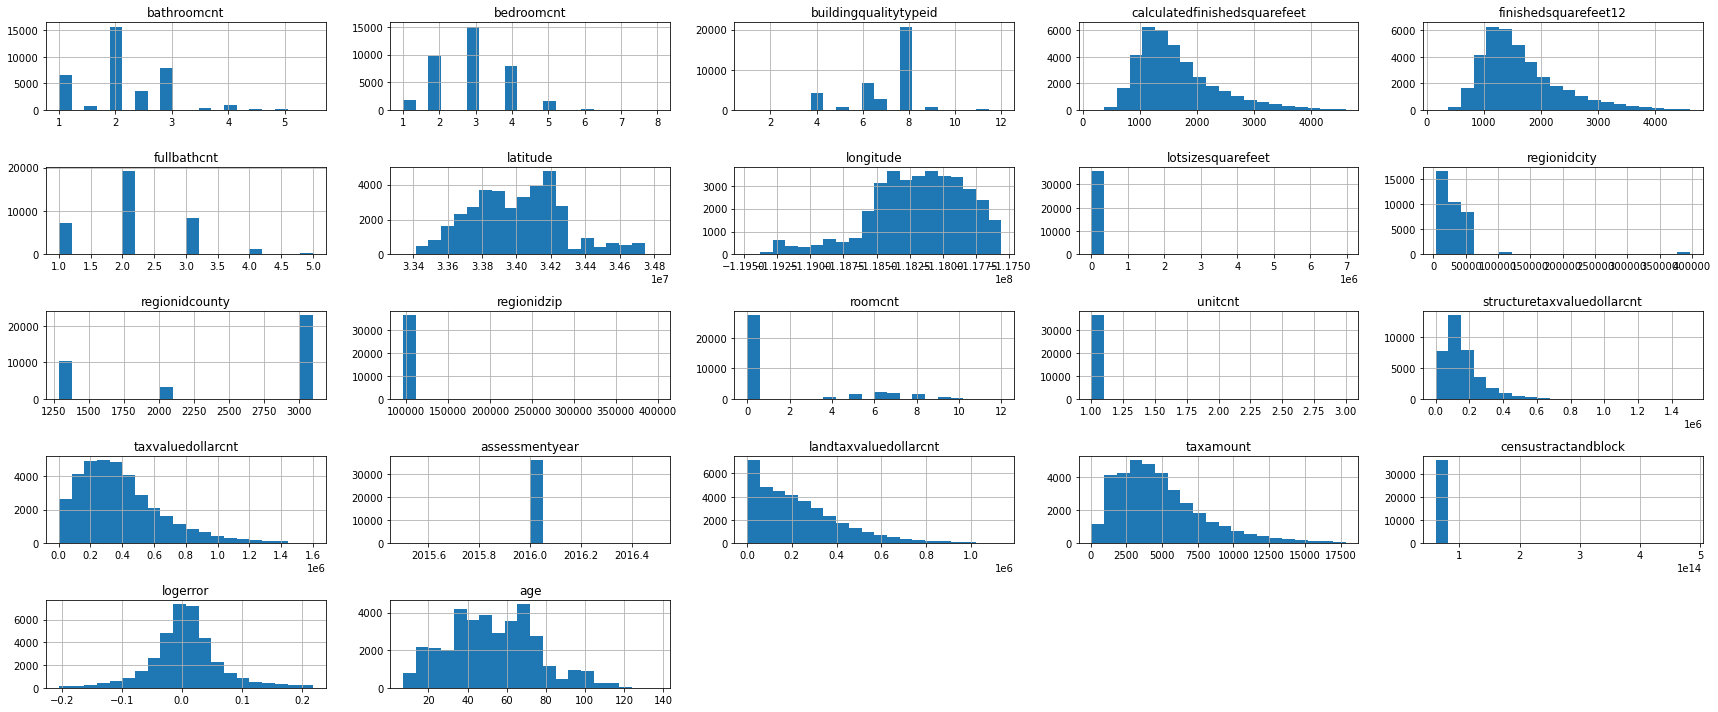

In [13]:
train.hist(figsize = (24,10), bins = 20)
plt.tight_layout()

### Does logerror differ between fips

In [16]:
train.county.value_counts()

Los_Angeles    22802
Orange         10363
Ventura         3144
Name: county, dtype: int64

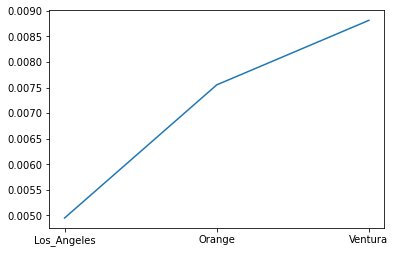

In [28]:
plt.plot(train.groupby(by='county').logerror.mean())

<AxesSubplot:>

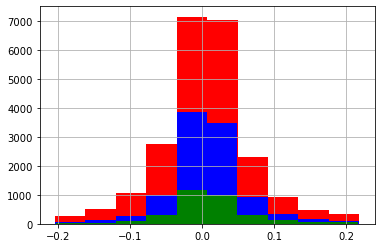

In [17]:
# plotting histogram of the log error in different fips code

ax = train[train.county == 'Los_Angeles'].logerror.hist(color = 'red')
train[train.county == 'Orange'].logerror.hist(ax = ax, color = 'blue')
train[train.county == 'Ventura'].logerror.hist(ax = ax, color = 'green')

<AxesSubplot:xlabel='county', ylabel='logerror'>

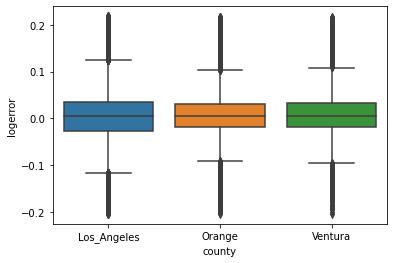

In [18]:
sns.boxplot(train.county, train.logerror)

In [27]:
train.logerror.mean()

0.006026351023219386

In [19]:
train.groupby(by='county').logerror.mean()

county
Los_Angeles    0.004948
Orange         0.007553
Ventura        0.008815
Name: logerror, dtype: float64

In [20]:
# data is .groupby on fips to provide some descriptive stats on logerror

train.groupby('county').logerror.describe()

,count,mean,std,min,25%,50%,75%,max
county,,,,,,,,
Los_Angeles,22802.0,0.004948,0.062256,-0.204664,-0.026066,0.005349,0.034278,0.218255
Orange,10363.0,0.007553,0.052725,-0.204762,-0.018292,0.005361,0.030564,0.217817
Ventura,3144.0,0.008815,0.056588,-0.203798,-0.018877,0.005491,0.031985,0.217128


H0: There is no change in logerror between counties

#### Takeaway:
     - the logerror seems even distributed between
     - there seems to be a much higher volume of fips code 6037

### Does age affect the logerror

In [21]:
train.age.describe()

count    36292.000000
mean        52.494627
std         22.637857
min          7.000000
25%         35.000000
50%         51.000000
75%         68.000000
max        137.000000
Name: age, dtype: float64

In [22]:
train['age_bin'] = pd.cut(train.age, [0, 30, 50, 70, 137])
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county,age,age_bin
16119,2.0,2.0,4.0,1490.0,1490.0,2.0,34079307.0,-117941998.0,6679.0,0100,...,170213.0,3069.54,6.037405e+13,-0.024048,2017-03-10,Floor/Wall,Single Family Residential,Los_Angeles,56.0,"(50, 70]"
53116,2.5,3.0,8.0,1780.0,1780.0,2.0,33811109.0,-118053795.0,6175.0,122,...,222844.0,8205.20,6.059110e+13,-0.007992,2017-06-30,None,Single Family Residential,Orange,57.0,"(50, 70]"
41890,2.0,2.0,8.0,1257.0,1257.0,2.0,33609900.0,-117751000.0,7210.0,34,...,122215.0,2345.98,6.059063e+13,-0.064180,2017-05-31,Yes,Condominium,Orange,47.0,"(30, 50]"
65780,2.0,6.0,8.0,3585.0,3585.0,2.0,33956179.0,-117960799.0,44097.0,0100,...,272599.0,7642.08,6.037500e+13,-0.000868,2017-08-11,Floor/Wall,Single Family Residential,Los_Angeles,66.0,"(50, 70]"
58799,2.0,2.0,8.0,1230.0,1230.0,2.0,34014495.0,-118408105.0,7210.0,010E,...,445279.0,7357.13,6.037703e+13,-0.153472,2017-07-19,Central,Condominium,Los_Angeles,33.0,"(30, 50]"


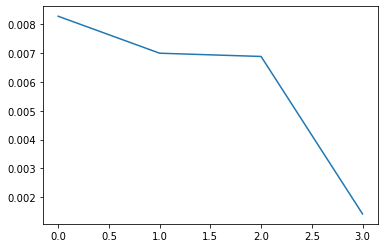

In [29]:
plt.plot(train.groupby(by='age_bin').logerror.mean())

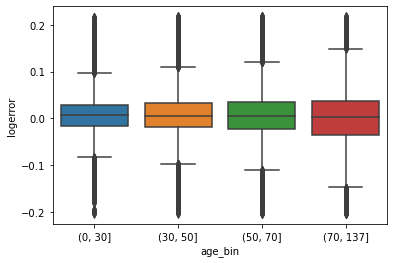

In [23]:
sns.boxplot(train.age_bin, train.logerror)
plt.show()

In [26]:
train.groupby('age_bin').logerror.describe()

,count,mean,std,min,25%,50%,75%,max
age_bin,,,,,,,,
"(0, 30]",6109.0,0.008278,0.048924,-0.204022,-0.015448,0.006779,0.029332,0.217276
"(30, 50]",11588.0,0.006995,0.054442,-0.203798,-0.019470,0.005838,0.032193,0.218135
"(50, 70]",11294.0,0.006882,0.060021,-0.204664,-0.023910,0.004851,0.034078,0.218167
"(70, 137]",7301.0,0.001417,0.071486,-0.204762,-0.036546,0.003388,0.037582,0.218255


### Are there zipcodes where the logerror is higher or lower than the average logerror?

In [24]:
train.logerror.mean()

0.006026351023219386

In [25]:
train.groupby('regionidzip').logerror.describe()

,count,mean,std,min,25%,50%,75%,max
regionidzip,,,,,,,,
95982.0,37.0,-0.005814,0.082613,-0.169431,-0.053621,-0.019403,0.040157,0.214760
95983.0,79.0,-0.010500,0.071961,-0.200561,-0.060799,-0.001750,0.033346,0.197541
95984.0,54.0,-0.011440,0.063032,-0.173852,-0.046003,-0.008430,0.027118,0.185490
95985.0,67.0,0.013336,0.077830,-0.185503,-0.019272,0.019733,0.057829,0.213379
95986.0,46.0,0.024664,0.071392,-0.103545,-0.022191,0.023172,0.045187,0.204836
...,...,...,...,...,...,...,...,...
97329.0,298.0,0.006955,0.048687,-0.156101,-0.017266,0.007946,0.025874,0.186905
97330.0,194.0,-0.006275,0.047651,-0.144365,-0.033480,-0.006703,0.015107,0.144299
97331.0,7.0,0.017279,0.138709,-0.166361,-0.095967,0.048324,0.127861,0.175201


In [30]:
from scipy import stats
''' creating a function that runs a one sample t test and returns a list of zipcode with 
higher and lower mean compared to the overall average
'''


def get_zip_with_high_logerror(df):
    zipcode = []
    for num in df.regionidzip.unique():
        a = 0.025
        x1 = df[df.regionidzip == num].logerror
        x2 = df.logerror
        t, p = stats.ttest_1samp(x1, x2.mean())
        if (t > 0) & (p < a):
            zipcode.append(num)
        
    return zipcode

def get_zip_with_low_logerror(df):
    zipcode = []
    for num in df.regionidzip.unique():
        a = 0.025
        x1 = df[df.regionidzip == num].logerror
        x2 = df.logerror
        t, p = stats.ttest_1samp(x1, x2.mean())
        if (t < 0) & (p < a):
            zipcode.append(num)
        
    return zipcode

In [31]:
high_zipcode = get_zip_with_high_logerror(train)

low_zipcode = get_zip_with_low_logerror(train)


print(f'Here are the high logerror zipcodes \n{high_zipcode}')
print()

print(f'Here are the low logerror zipcodes \n {low_zipcode}')

Here are the high logerror zipcodes 
[96336.0, 96475.0, 96985.0, 97298.0, 96398.0, 96387.0, 96969.0, 97106.0, 96351.0, 96103.0, 95988.0, 97068.0, 96465.0, 96122.0, 96469.0, 96216.0, 96959.0, 96513.0, 96116.0, 96486.0, 96490.0, 96217.0, 96204.0, 95998.0]

Here are the low logerror zipcodes 
 [96023.0, 95989.0, 96095.0, 96047.0, 96137.0, 96410.0, 97318.0, 96294.0, 97006.0, 97104.0, 96171.0, 96941.0, 97048.0, 97330.0, 95997.0, 96515.0, 96371.0, 96092.0, 97018.0, 96271.0, 96280.0, 96326.0, 96007.0]


#### Takeaways:
     - a handful of zipcodes are significanly higher than the average log error
     - There are certain zipcodes taht are significantly lower than the average logerror